In [1]:

import numpy as np
import pandas as pd
import os
pd.set_option('display.max_colwidth', None)
output_dir = "/Users/juankostelec/Google_drive/Projects/taxGPT-database/data/testing"


In [2]:
path = "/Users/juankostelec/Google_drive/Projects/taxGPT-database/data/downloaded_data_index.csv"
df = pd.read_csv(path)
df["is_pisrs"] = df["raw_filepath"].apply(lambda x: "pisrs" in x.lower())
df["is_eurlex"] = df["raw_filepath"].apply(lambda x: "eur-lex" in x.lower())
print(df["file_type"].value_counts())
print(df.columns)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/juankostelec/Google_drive/Projects/taxGPT-database/data/downloaded_data_index.csv'

Opozorilo: Besedilo osnovnega predpisa

ZAKON

O FINANČNI UPRAVI (ZFU)

I. SPLOŠNE DOLOČBE

1. člen

(vsebina zakona)

Ta zakon ureja načela delovanja, organizacijo, naloge in pooblastila finančne
uprave, pravice ter posebnosti delovno-pravnih razmerij javnih uslužbencev in
javnih uslužbenk finančne uprave (v nadaljnjem besedilu: uslužbenci finančne
uprave) in druga vprašanja, povezana z delovanjem finančne uprave.

2. člen

(opredelitev pojmov)

Pojmi, uporabljeni v tem zakonu, pomenijo:

1.      obvezna dajatev vključuje pojem davka, kot je opredeljen z zakonom, ki ureja davčni postopek, uvozne in izvozne dajatve, predpisane s predpisi Evropske unije (v nadaljnjem besedilu: EU), prispevke za socialno varnost in druge dajatve, ki so prihodek ene od blagajn javnega financiranja ali proračuna EU in so s posebnim predpisom predpisane kot splošno obvezne ter za pobiranje katerih je pristojna finančna uprava. Obvezna dajatev vključuje tudi koncesijsko dajatev, če je za finančni nadzor v zv
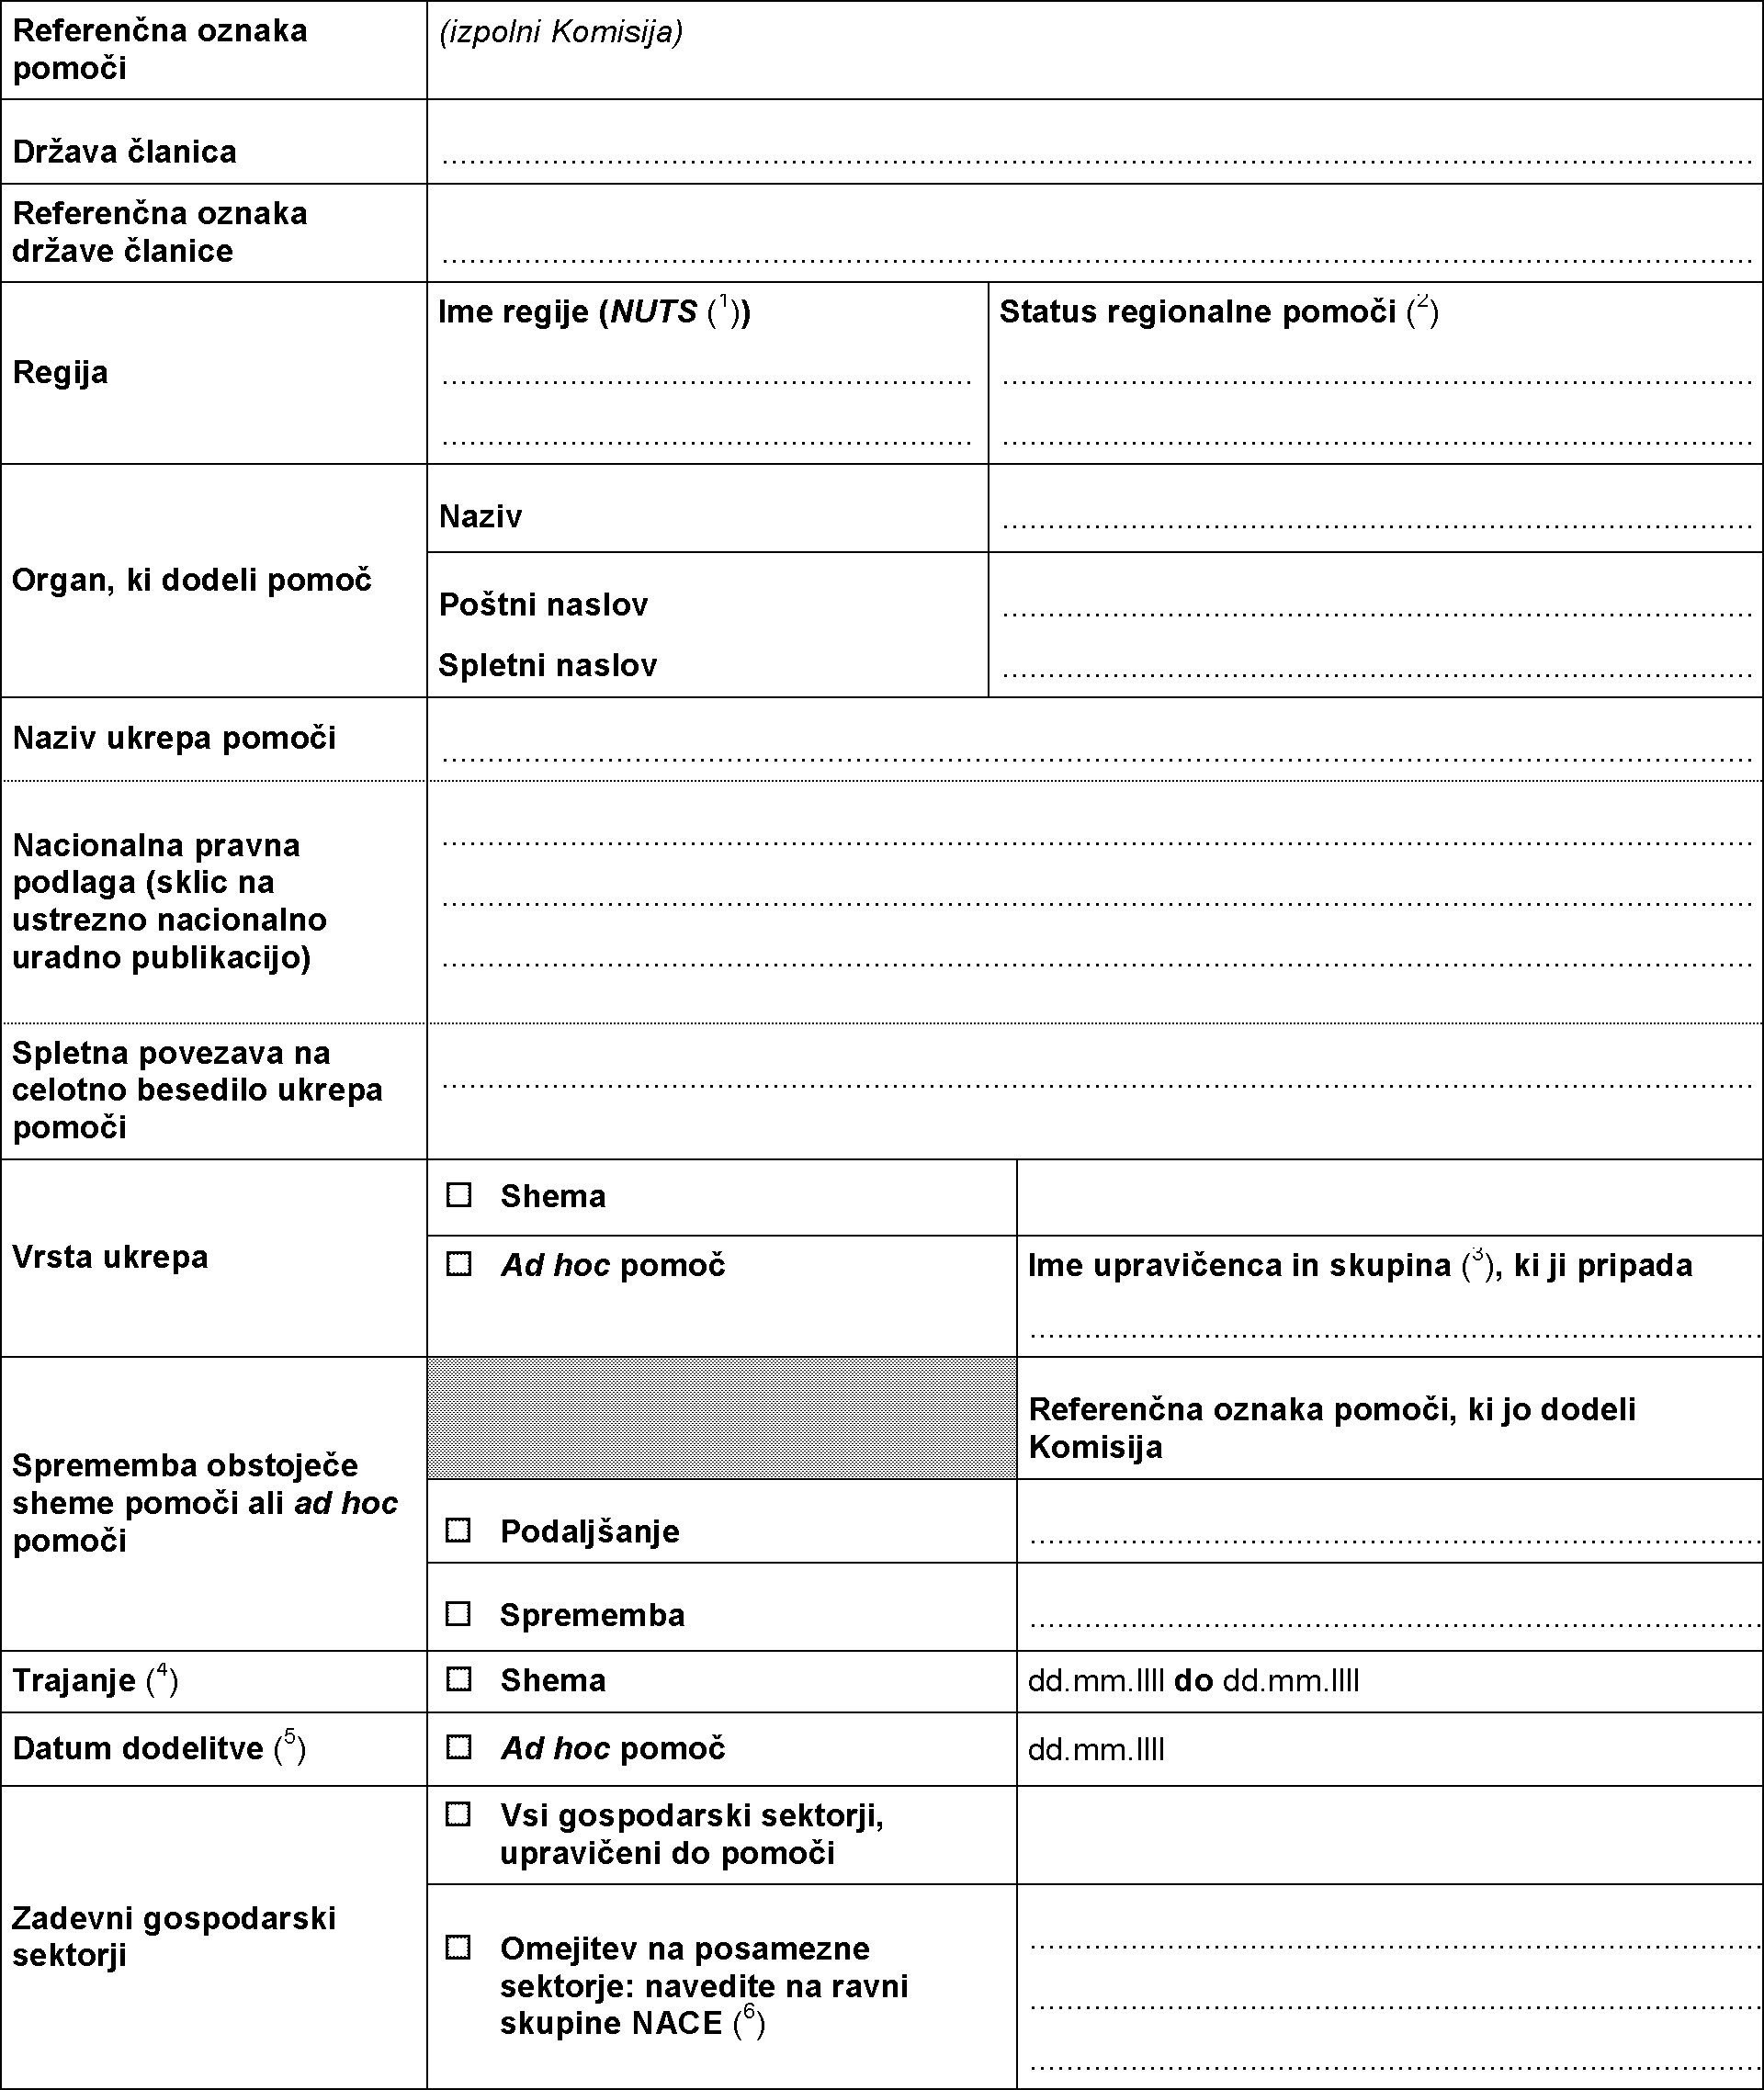
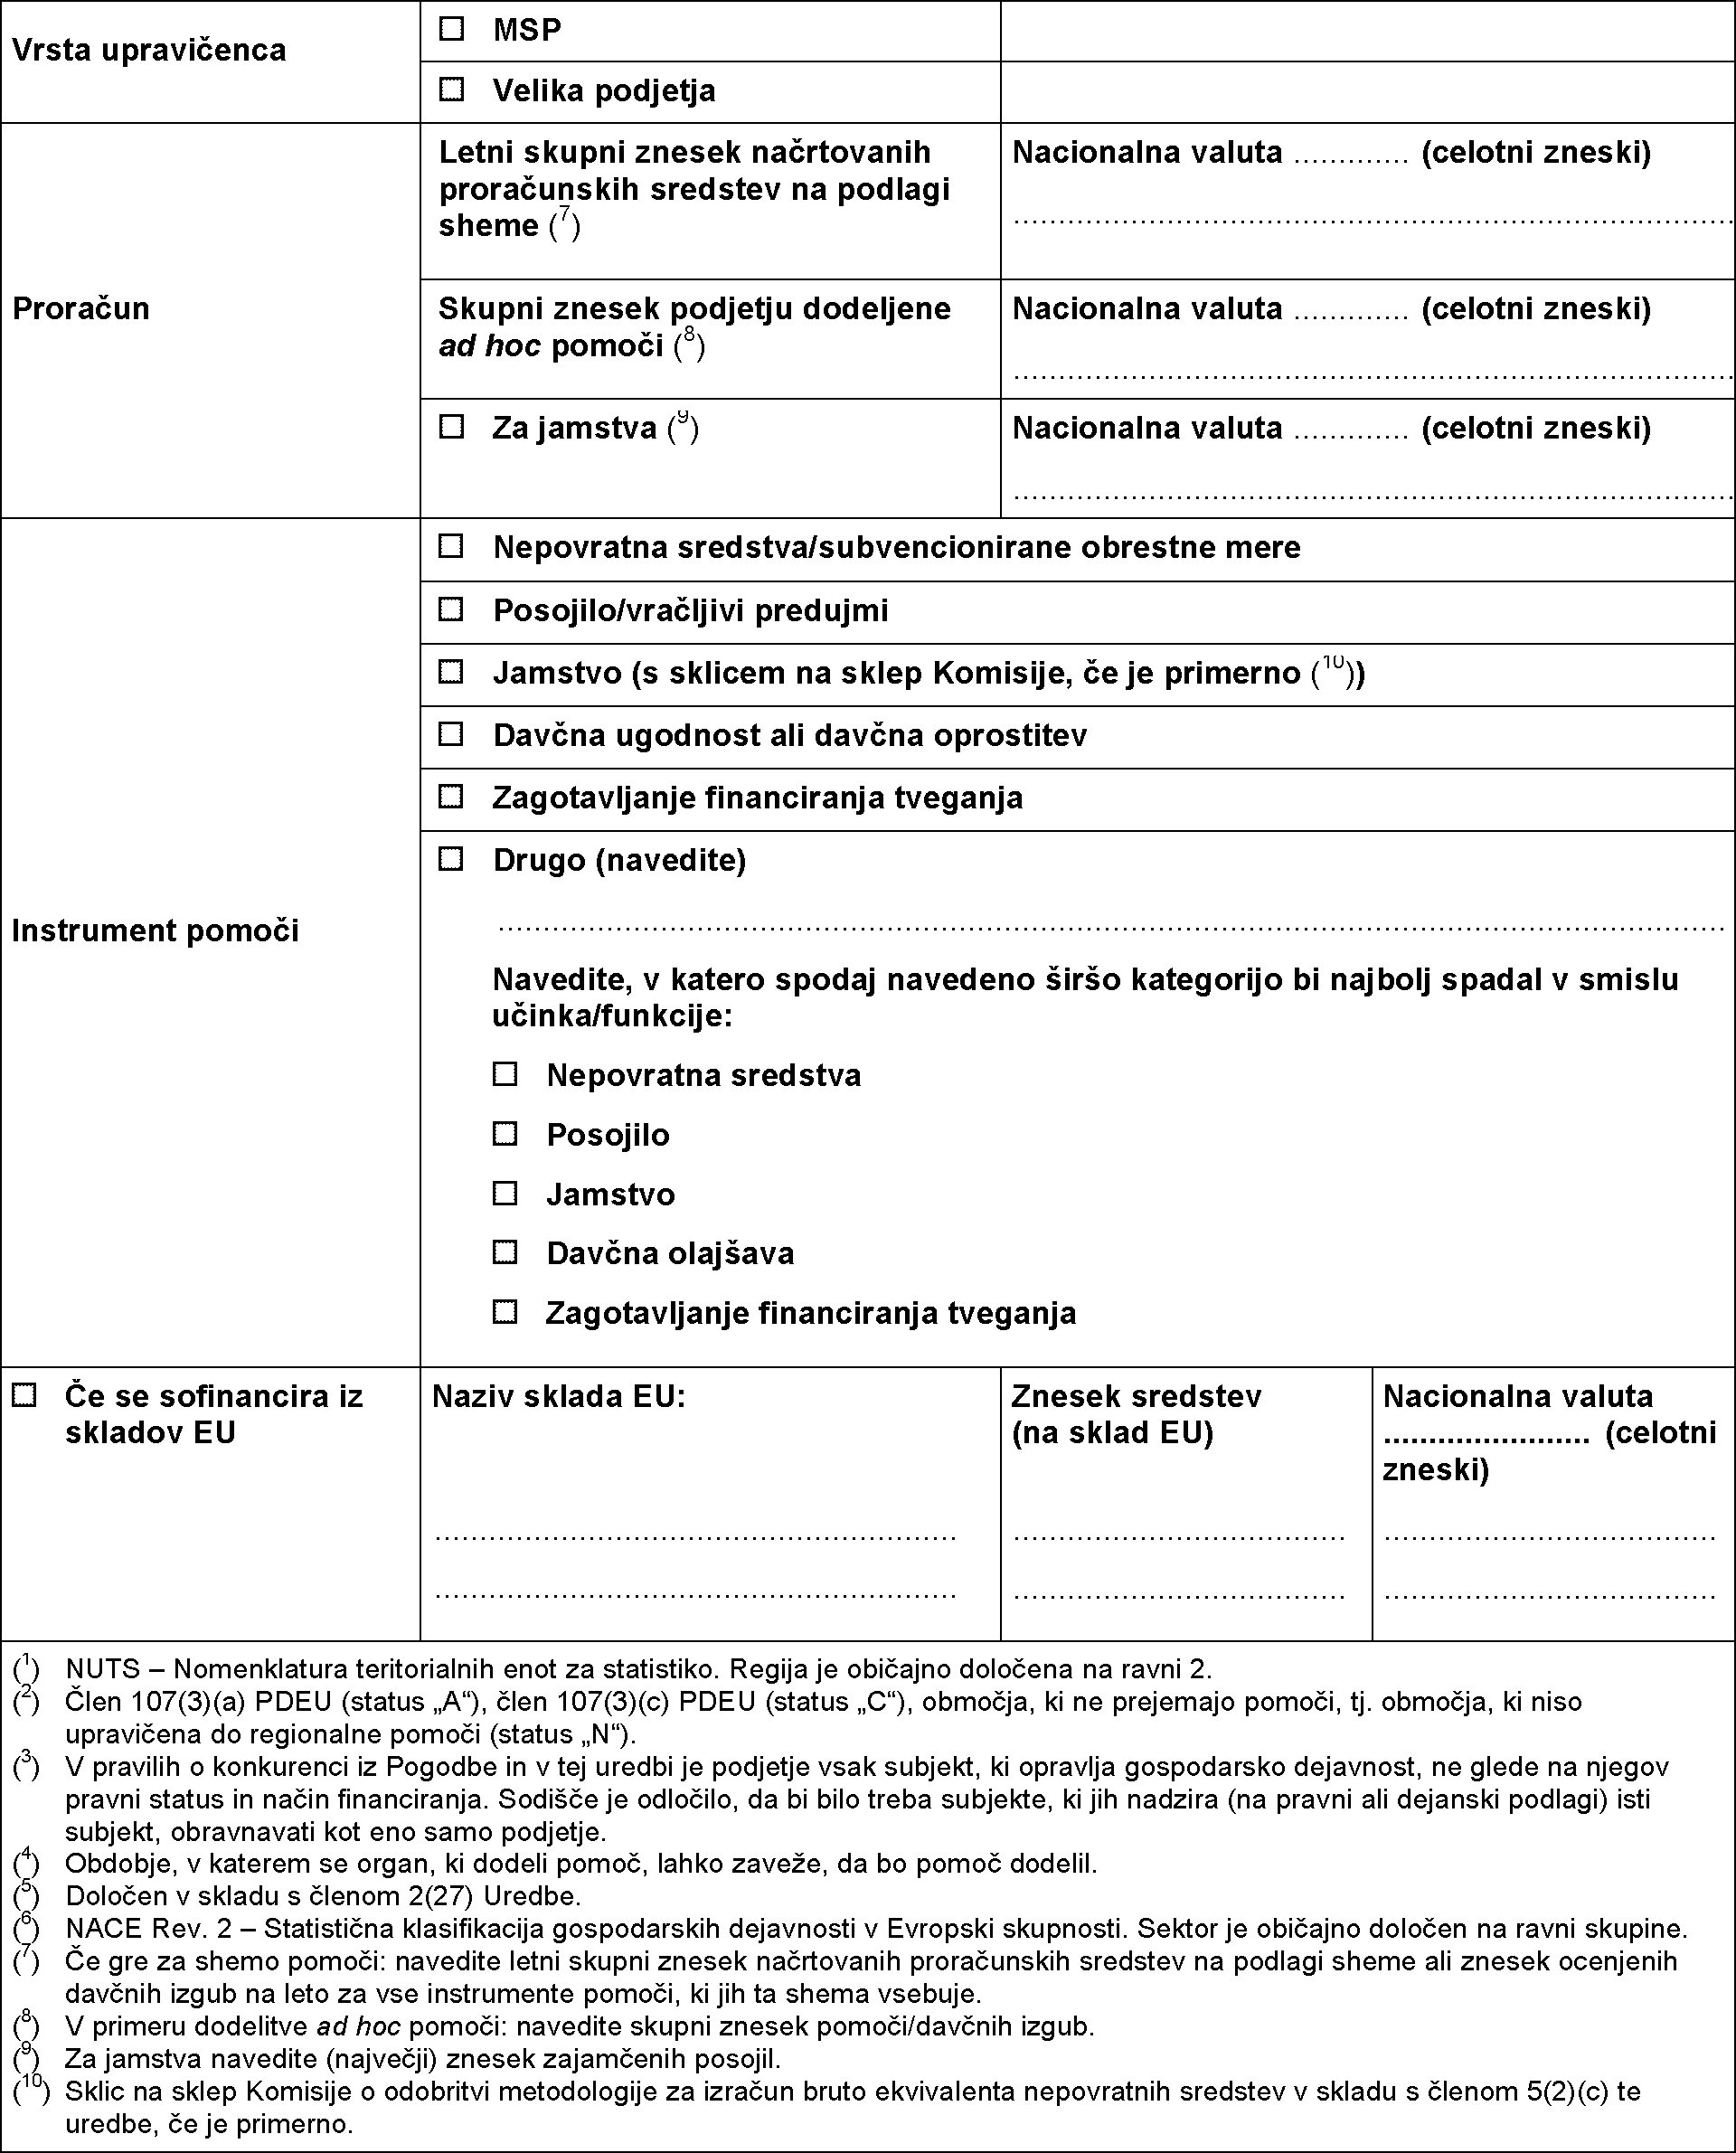

In [3]:
# LEt's try to use pandoc to convert one of each file to see the results

# Let's get an HTML file from PISRS source
pisrs_html_file_path = df[df["is_pisrs"]]["downloaded_path"].iloc[0]
eurlex_html_file_path = df[df["is_eurlex"]]["raw_filepath"].iloc[0]
eurlex_html_file_path = "/Users/juankostelec/Google_drive/Projects/taxGPT-database/data/testing/Document_02014R0651-20230701.html"

import html2text
h = html2text.HTML2Text()
h.ignore_links = True
with open(pisrs_html_file_path, "r" ) as fin:
    print(h.handle(fin.read()))

with open(eurlex_html_file_path, "r" ) as fin:
    print(h.handle(fin.read()))
# TODO: Save the text file

# For EURLEX - use html2Text to convert to text file directly
# For PISRS - we can also use html2text to covnert to text file directly

In [4]:
docx_file_path = df[df["file_type"] == "docx"]["downloaded_path"].iloc[0]
# Try converting using pandoc:
# !pandoc -f html -t markdown -o {output_dir}/pisrs_output.md {pisrs_html_file_path}
!pandoc -f docx -t markdown -o {output_dir}/docx_output.md {docx_file_path}

# Pandoc works well for docx


In [5]:
# For .doc files we need to first convert to .docx and then we can use pandoc
doc_file_path = df[df["file_type"] == "doc"]["downloaded_path"].iloc[0]
# !soffice --convert-to docx {doc_file_path} --outdir {output_dir}

#  Now convert the resulting .docx to text with pandoc
filename = os.path.basename(doc_file_path).replace('.doc', '')
converted_doc_file_path = os.path.join(output_dir, f"{filename}.docx")

# !pandoc -f docx -t markdown -o {output_dir}/doc_output.md {converted_doc_file_path}

# This works fine


In [4]:
# For .pdf files we can try several pdf to text converter. Let's test:
# pdf_file_path = df[df["file_type"] == "pdf"]["downloaded_path"].iloc[10]
pdf_file_path = "/Users/juankostelec/Google_drive/Projects/taxGPT-database/cellar_a5bb0db0-ab46-43f7-a73f-cc75781a232b.0018.01_DOC_1.pdf"
print(pdf_file_path)

# Detect header, footer, tables, titles, text between titles
# We can use marker-pdf package, which combines Deep learning models to carry out the work
# let's test it
from marker.convert import convert_single_pdf
from marker.logger import configure_logging
from marker.models import load_all_models
import json

output_path = f"{output_dir}/pdf_output.md"
model_lst = load_all_models()
full_text, out_meta = convert_single_pdf(pdf_file_path, model_lst, parallel_factor=1)
with open(output_path, "w+", encoding='utf-8') as f:
    f.write(full_text)
out_meta_filename = output_path.rsplit(".", 1)[0] + "_meta.json"
with open(out_meta_filename, "w+") as f:
    f.write(json.dumps(out_meta, indent=4))





# from langchain_community.document_loaders import PyMuPDFLoader
# data = PyMuPDFLoader(pdf_file_path).load()
# # print(data)
# text = "".join([d.page_content for d in data])
# print(text)
# Let's compare the PyMuPDF and PDFPlumber


/Users/juankostelec/Google_drive/Projects/taxGPT-database/cellar_a5bb0db0-ab46-43f7-a73f-cc75781a232b.0018.01_DOC_1.pdf


config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/504M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/504M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/625M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Loaded texify model to mps with torch.float16 dtype


/Users/juankostelec/opt/anaconda3/envs/taxGPT/lib/python3.11/site-packages/transformers/modeling_utils.py:1051: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [49]:
# text excel file
xlsx_file_path = df[df["file_type"] == "xlsx"]["downloaded_path"].iloc[3]
print(xlsx_file_path)
# !pandoc -f xlsx -t markdown -o {output_dir}/xlsx_output.md {xlsx_file_path}
from tabulate import tabulate

def xlsx_to_html(xlsx_file_path, html_file_path):
    df = pd.read_excel(xlsx_file_path)
    html_content = df.to_html(index=False)
    with open(html_file_path, 'w') as file:
        file.write(html_content)
    return html_content

def xlsx_to_markdown(xlsx_file_path, md_file_path):
    df = pd.read_excel(xlsx_file_path)
    markdown_content = tabulate(df, headers='keys', tablefmt='pipe', showindex=False)
    with open(md_file_path, 'w') as file:
        file.write(markdown_content)
    return markdown_content

def xlsx_to_csv(xlsx_file_path, csv_file_path):
    df = pd.read_excel(xlsx_file_path)
    df.to_csv(csv_file_path, index=False)
    return

# xlsx_to_html(xlsx_file_path, f"{output_dir}/xlsx_output.html")
xlsx_to_markdown(xlsx_file_path, f"{output_dir}/xlsx_output.md")
# xlsx_to_csv(xlsx_file_path, f"{output_dir}/xlsx_output.csv")


# Excel to markdown seems to be the best of the options

/Users/juankostelec/Google_drive/Projects/taxGPT-database/data/raw_data/Seznam_vrst_dohodkov_REK-O_od_1._1._2023.xlsx
